In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy.stats as sp
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [4]:
#Inicializamos la base de datos
datos = load_breast_cancer()

# 0 -> Maligno
# 1 -> Benigno

#x: datos, y: resultado
y = datos.target
x = pd.DataFrame(np.array(datos.data), columns = datos.feature_names)
#Mostar tabla
x.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


1)

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)

#Grafica de frecuencia de tumor maligno vs benigno.
import matplotlib.pyplot as plt
plt.hist(y, bins=2, edgecolor='black')
plt.xticks([0,1], ['Maligno[0]', 'Benigno[1]'])
plt.ylabel('Frecuencia')
plt.xlabel('Tipo tumor')
plt.title('Distribucion de tipos de tumor.')
plt.show()

ValueError: ignored

2) Realizar	alguna	comprobación	y,	en	su	caso,	una	intervención	razonable	sobre	los	datos	(sólo	si	fuese precisa) para	asegurar	su	completitud,	consistencia, etc. (0.5 puntos)

In [ ]:


#Eliminar datos incompletos e inconsistentes (null o fuera de [sigma*3, sigma*3])
datosAntes = x.shape[0]
print(f"nº datos original: {datosAntes}")

removedTargets = []
#Iterar sobre cada columna
for columna in x.columns:
  media = x[columna].mean()
  desv = x[columna].std()

  #Iterar sobre cada fila
  for i, value in x[columna].items():
    if value is None or value < media - (desv * 3) or value > media + (desv * 3):
      x = x.drop(i)
      removedTargets.append(i)

#Eliminar filas de los datos
x = x.reset_index(drop = True)

#Eliminar filas de resultados
removedTargets.reverse()
y = np.delete(y, removedTargets)

datosDespues = x.shape[0]
print(f"nº datos purgados: {datosDespues}")
print(f"total datos eliminados: {datosAntes - datosDespues}")


nº datos original: 569
nº datos purgados: 427
total datos eliminados: 142


3) Emplear	 un	 modelo	 de	 k-nn,	 los	 hiper-parámetros	 óptimos	 mediante	 algún procedimiento	(1	punto).

Mejor valor de n_neighbors: 15
Precisión en conjunto de test: 0.9274725274725275
Precisión en conjunto de entrenamiento con el mejor modelo: 0.9374
Precisión en conjunto de test con el mejor modelo: 0.9211


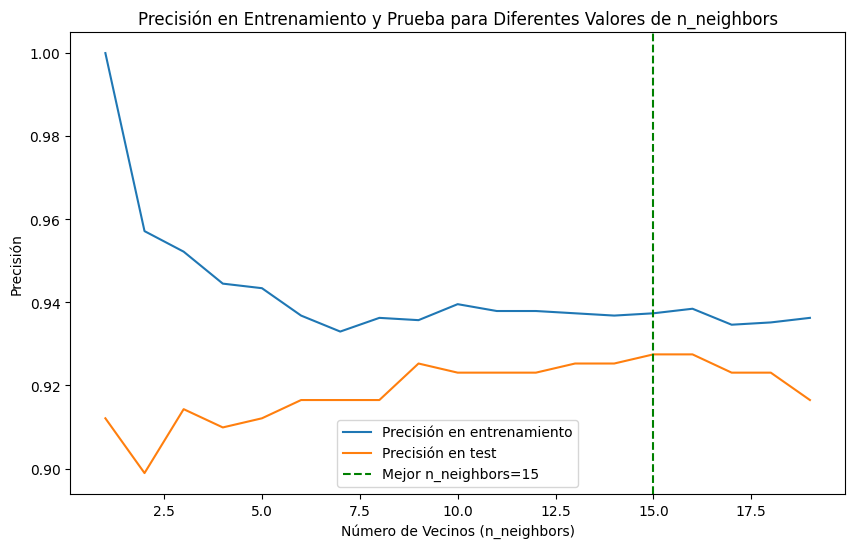

In [ ]:
# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir los hiperparámetros y sus valores a probar
param_grid = {'n_neighbors': np.arange(1, 20)}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Ajustar el modelo con la búsqueda en cuadrícula
grid_search.fit(x_train, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
results = grid_search.cv_results_

# Obtener el mejor valor de n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Imprimir los resultados
print("Mejor valor de n_neighbors:", best_n_neighbors)
print("Precisión en conjunto de test:", grid_search.best_score_)

# Entrenar el modelo final con el mejor valor de n_neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento y prueba
train_accuracy_knn = results['mean_train_score'][results['params'].index({'n_neighbors': best_n_neighbors})]
test_accuracy_knn = best_knn.score(x_test, y_test)

# Imprimir las precisiones
print(f"Precisión en conjunto de entrenamiento con el mejor modelo: {train_accuracy_knn:.4f}")
print(f"Precisión en conjunto de test con el mejor modelo: {test_accuracy_knn:.4f}")

# Graficar la precisión en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_train_score'], label='Precisión en entrenamiento')
plt.plot(results['param_n_neighbors'], results['mean_test_score'], label='Precisión en test')
plt.axvline(x=best_n_neighbors, color='green', linestyle='--', label=f'Mejor n_neighbors={best_n_neighbors}')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Precisión')
plt.title('Precisión en Entrenamiento y Prueba para Diferentes Valores de n_neighbors')
plt.legend()
plt.show()

# Realizar predicciones para matriz de confusión en el conjunto de prueba
y_pred = best_knn.predict(x_test)

# Calcular la matriz de confusión
knn_conf_matrix = confusion_matrix(y_test, y_pred)

Se define una cuadrícula de hiperparámetros para buscar los mejores valores para el número de vecinos, y se aplica la búsqueda de hiperparámetros con validación cruzada.

Después de la ejecución, se obtienen los mejores hiperparámetros encontrados y la precisión del modelo KNN en el conjunto de prueba utilizando esos hiperparámetros.

4) Hacer	lo	mismo	 para	 un	modelo	lineal empleando	 algún	 criterio	 analítico (1	punto).


In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from itertools import combinations
import random
df = pd.DataFrame(datos.data, columns=datos.feature_names)
df['target'] = datos.target
# Definir la cantidad de grupos y características por grupo
num_groups = 8
min_features_per_group = 8
max_features_per_group = 12

# Crear los grupos de características
feature_groups = []
for _ in range(num_groups):
    num_features = random.randint(min_features_per_group, max_features_per_group)
    feature_combination = random.sample(df.drop('target', axis=1).columns.tolist(), num_features)
    feature_groups.append(feature_combination)

best_model = None
best_aic = float('inf')

# Iterar sobre cada grupo y ajustar el modelo
for features in feature_groups:
    # Ajustar un modelo lineal usando OLS de statsmodels
    x_train_subset = x_train[list(features)]
    x_train_subset = add_constant(x_train_subset)
    model = OLS(y_train, x_train_subset).fit()

    # Calcular el criterio de Akaike (AIC)
    aic = 2 * (len(features) + 1) - 2 * model.llf

    # Actualizar el mejor modelo si es necesario
    if aic < best_aic:
        best_aic = aic
        best_model = model
        best_features = features
        y_train_pred = best_model.predict(x_train_subset)
        y_test_pred = best_model.predict(add_constant(x_test[list(features)]))
        best_ent_ml= accuracy_score(y_train_pred.round(), y_train)
        best_test_ml=accuracy_score(y_test_pred.round(), y_test)
# Imprimir el resumen del mejor modelo
print(f"Mejor AIC: {best_aic:.4f}")
print("Características del modelo:", best_features)
print(f"Exactitud test: {best_test_ml:.4f}")
print(f"Exactitud entrenamiento {best_ent_ml:.4f}")

# Calcular la matriz de confusión para el conjunto de prueba
aic_conf_matrix = confusion_matrix(y_test, y_test_pred.round())

Mejor AIC: 17.3542
Características del modelo: ['mean area', 'mean concavity', 'worst texture', 'concavity error', 'mean perimeter', 'fractal dimension error', 'worst area', 'mean compactness', 'worst concavity', 'worst smoothness', 'mean smoothness', 'worst radius']
Exactitud test: 0.9474
Exactitud entrenamiento 0.9560


Hacemos modelos lineales con 8 posibles agrupaciones de caracteristicas y segun el criterio de akaike mostramos el modelo mas optimo.

5) Hacer	lo	mismo	para	un	modelo	de	árboles	(1	punto).


La profundidad óptima es: 4
La precisión en prueba del modelo óptimo es: 0.9474
La precisión en entrenamiento del modelo óptimo es: 0.9978


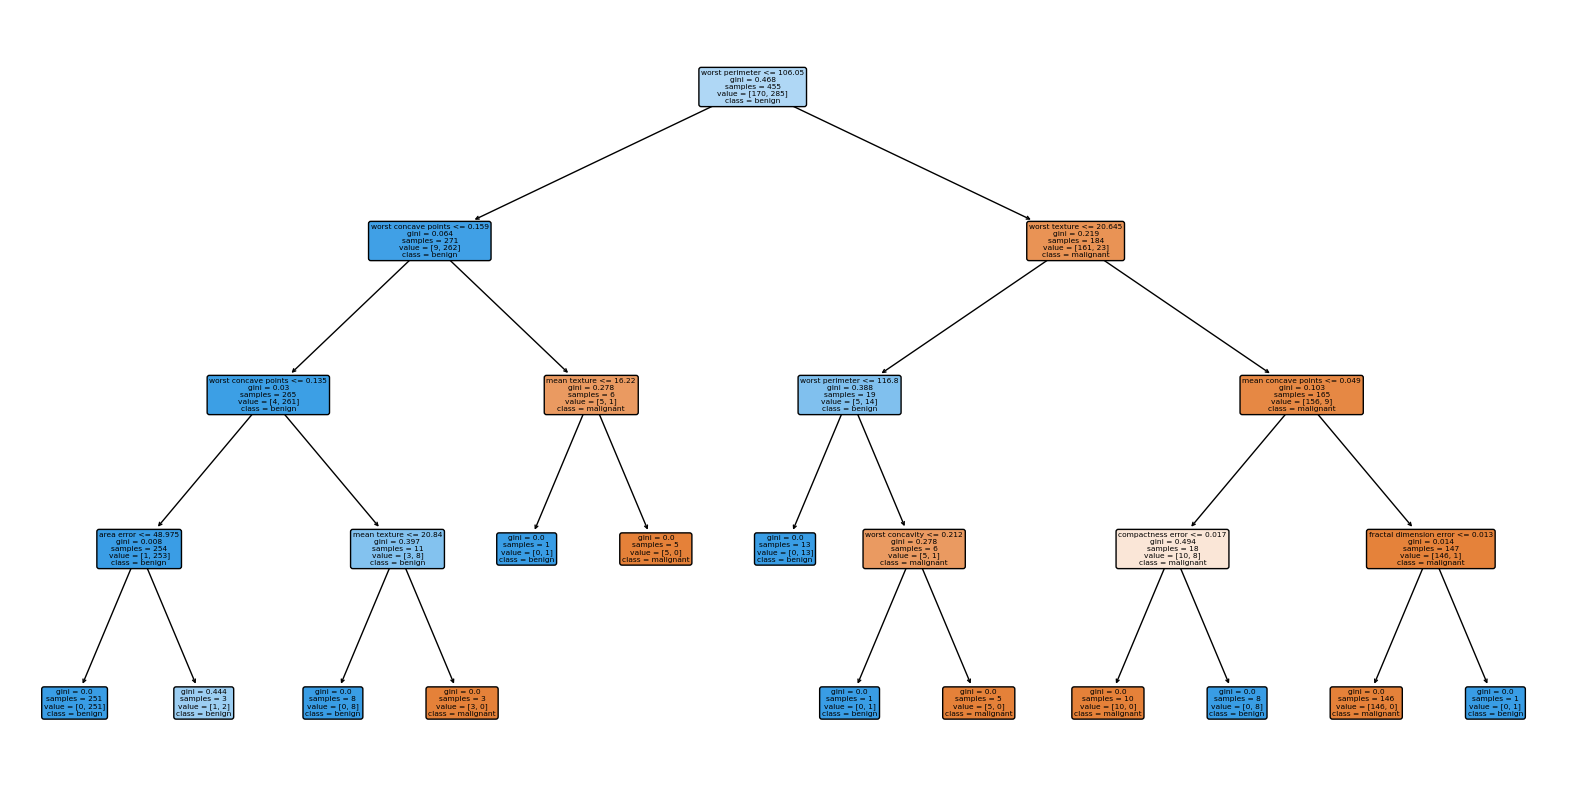

In [ ]:
from sklearn import tree
#Inicializamos la base de datos
datos = load_breast_cancer()

# 0 -> Maligno
# 1 -> Benigno

#x: datos, y: resultado
y = datos.target
x = pd.DataFrame(np.array(datos.data), columns = datos.feature_names)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=0)

# Probar diferentes profundidades usando validación cruzada
depth_range = range(1, 15)
best_accuracy_arbol = 0
best_depth = 0
best_y_pred_test = 0

for depth in depth_range:
    model.set_params(max_depth=depth)

    # Realizar validación cruzada con 5 divisiones
    scores = cross_val_score(model, x, y, cv=5)

    # Calcular la precisión promedio
    mean_accuracy = scores.mean()

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(x_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_test = model.predict(x_test)
    y_pred_train= model.predict(x_train)

    # Calcular la precisión en el conjunto de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train= accuracy_score(y_train, y_pred_train)


    # Actualizar la profundidad óptima si se encuentra un mejor modelo
    if accuracy_test > best_accuracy_arbol:
        best_accuracy_arbol = accuracy_test
        best_train_arbol=accuracy_train
        best_depth = depth
        best_y_pred_test = y_pred_test

# Imprimir la profundidad óptima y la precisión en prueba
print(f"\nLa profundidad óptima es: {best_depth}")
print(f"La precisión en prueba del modelo óptimo es: {best_accuracy_arbol:.4f}")
print(f"La precisión en entrenamiento del modelo óptimo es: {best_train_arbol:.4f}")
#Dibujar arbol
bclf= DecisionTreeClassifier(max_depth=best_depth)
bclf.fit(x_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(bclf, filled=True, feature_names=datos.feature_names, class_names= datos.target_names,rounded= True)
plt.show()

# Calcular la matriz de confusión
tree_conf_matrix = confusion_matrix(y_test, best_y_pred_test)

Este código utiliza la validación cruzada con GridSearchCV para encontrar los mejores hiperparámetros para el árbol de decisión (en este caso, la profundidad máxima del árbol) y también encuentra el mejor valor de k para el algoritmo KNN. Al final, da el modelo de árbol de decisión con los mejores hiperparámetros y el modelo KNN con el mejor valor de k para utilizarlos en tus predicciones.

6) Hacer	lo	mismo	para	un	modelo	bayesiano	empleando	como	hiper	parámetro	la constante	de	suavizado (1 punto).


In [ ]:
# Importar bibliotecas necesarias
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB

# Cargar la base de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = MultinomialNB()

# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'alpha': [1e-10,0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Imprimir los mejores parámetros y la precisión en el conjunto de prueba
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir resultados
print(f"Mejores parámetros: {best_params}")
print(f"Precisión en el conjunto de prueba: {best_model.score(X_test, y_test):.4f}")
print(f"Precision conjunto de entrenamiento:{best_model.score(x_train, y_train):.4f}")


# Realizar predicciones para matriz de confusión en el conjunto de prueba
y_pred = best_model.predict(x_test)

# Calcular la matriz de confusión
bayes_conf_matrix = confusion_matrix(y_test, y_pred)

Mejores parámetros: {'alpha': 1e-10}
Precisión en el conjunto de prueba: 0.9386
Precision conjunto de entrenamiento:0.8857


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


Utiliza la validación cruzada con GridSearchCV para encontrar el mejor valor de suavizado para el clasificador bayesiano ingenuo (Naive Bayes) y. Al final, se tiene el modelo Naive Bayes con el mejor valor de suavizado.


7) Comparar los	resultados	obtenidos	con	los	distintos modelos	(1 punto)


nº vecinos optimo: 15
Exactitud test knn: 0.9210526315789473
Exactitud train knn: 0.9373626373626374

Mejor AIC: 17.354212330054793
Características del modelo: ['mean area', 'mean concavity', 'worst texture', 'concavity error', 'mean perimeter', 'fractal dimension error', 'worst area', 'mean compactness', 'worst concavity', 'worst smoothness', 'mean smoothness', 'worst radius']
Exactitud test: 0.9473684210526315
Exactitud entrenamiento 0.9560439560439561

La profundidad óptima es: 4
La precisión en prueba del modelo óptimo es: 0.9462
La precisión en entrenamiento del modelo óptimo es: 0.9120

Mejores parámetros: {'alpha': 1e-10}
Precisión en el conjunto de prueba: 0.9386
Precision conjunto de entrenamiento:0.8857


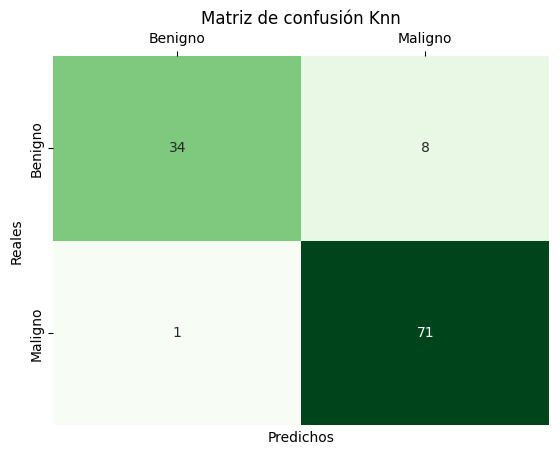

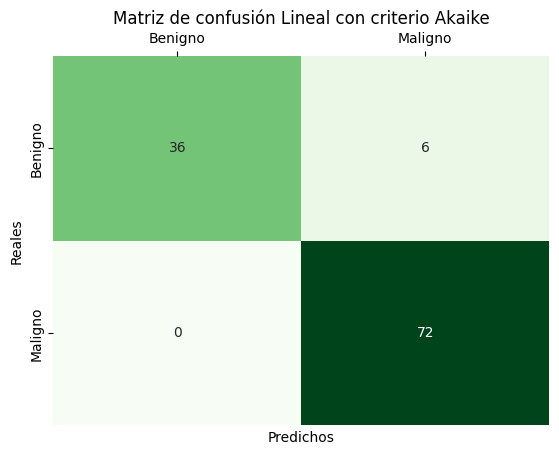

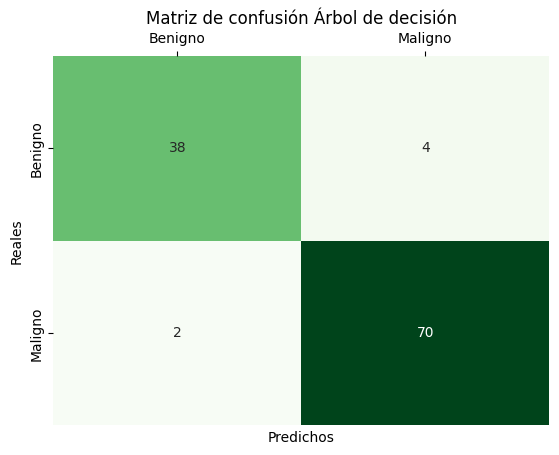

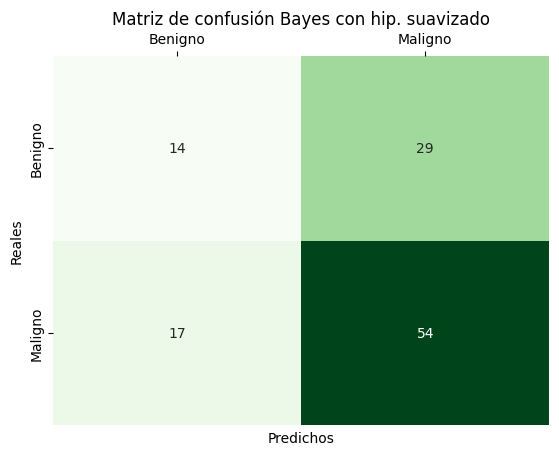

In [ ]:
#Exactitud en KNN
print("nº vecinos optimo:", best_n_neighbors)
print("Exactitud test knn:", test_accuracy_knn)
print("Exactitud train knn:", train_accuracy_knn)

# Exactitud Modelo Lineal
print("\nMejor AIC:", best_aic)
print("Características del modelo:", best_features)
print("Exactitud test:", best_test_ml)
print("Exactitud entrenamiento", best_ent_ml)

# Exactitud Arboles
print(f"\nLa profundidad óptima es: {best_depth}")
print(f"La precisión en prueba del modelo óptimo es: {best_accuracy_arbol:.4f}")
print(f"La precisión en entrenamiento del modelo óptimo es: {best_train_arbol:.4f}")

# Exactitud Modelo Bayesiano
print(f"\nMejores parámetros: {best_params}")
print(f"Precisión en el conjunto de prueba: {best_model.score(X_test, y_test):.4f}")
print(f"Precision conjunto de entrenamiento:{best_model.score(x_train, y_train):.4f}")

modelos = {
  'knn': { 'nombre': 'Knn', 'modelo': knn_conf_matrix },
  'aic': { 'nombre': 'Lineal con criterio Akaike', 'modelo': aic_conf_matrix },
  'tree': { 'nombre': 'Árbol de decisión', 'modelo': tree_conf_matrix },
  'bayes': { 'nombre': 'Bayes con hip. suavizado', 'modelo': bayes_conf_matrix },
}

for model_key, model_info in modelos.items():
  #Mostrar tabla matrices de confusión
  ax = sns.heatmap(model_info['modelo'], annot=True, fmt="d", cmap="Greens", cbar=False,
              xticklabels=['Benigno', 'Maligno'],
              yticklabels=['Benigno', 'Maligno'])
  ax.xaxis.tick_top()
  plot.title(f"Matriz de confusión {model_info['nombre']}")
  plot.xlabel('Predichos')
  plot.ylabel('Reales')
  plot.show()
  print()

8) Plantear	 posibles	 críticas	 o	 mejoras	 de	 cada	 uno	 de	 los	 modelos	 o	 del procedimiento	seguido,	 tratando	de	evitar	la	 repetición	de	lo	mencionado	en clase	(1	punto)

# Problemas con los modelos y posibles soluciones
- **KNN:** Al tener un conjunto de datos grande (427 datos) hace que sea bastante robusto por la gran cantidad de datos, aunque esto nos va a hacer que sea muy costoso computacionalmente. Esto unido a que tiene un valor del hiperparámetro K alto, hace que tenga una gran carga computacional tambien. Esto mejoraría con un ajuste y preprocesamiento del conjunto de datos.
- **Modelo lineal:** Trabaja bastante bien con un conjunto de datos grande, tambien es bastante sensible a los datos atípicos, ya que es bastante rígido este modelo, por lo que eliminar estos datos, como hemos hecho en el apartado 2, hace que se ajuste de mejor manera.
- **Modelo de arboles:** Al aplicar un conjunto de datos grande, hace que haya un mayor riesgo de sobreajuste y que la complejidad del modelo sea superior. Al ser bastante inestable, si existen alguna variación en los datos de entrenamiento, habría un cambio en el árbol.
- **Modelo Bayesiano:**	Tenemos un valor bajo de la constante de suavizado, por lo que hace que el modelo sea bastante sensible a las frecuencias exactas de los datos de entrenamiento, por lo que puede aumentar el riesgo de sobreajuste. La computación puede volverse intensiva ante gran cantidad de datos, aunque sea bastante preciso a la hora de estimar.

9) Replicar los	análisis	anteriores,	sobre	otro	problema	médico	de	características	similares	 (clasificación	 binaria) explicando	 BREVEMENTE los	 resultados, empleando	 un	 código	 similar	 al	 utilizado	 en	 los	 puntos	 anteriores.	 Pueden consultarse	 bases	 de	 datos	 libres	 como	 las	 contenidas	 en	 el	 repositorio	kaggle.com. (3 puntos).


In [ ]:
filename = 'survey_lung_cancer.csv'
datos = pd.read_csv(filename)

datos['LUNG_CANCER'] = datos['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})
datos['GENDER']= datos['GENDER'].replace({'FEMALE':1, 'MALE':0})
X = datos.iloc[:,1:-1]
Y = datos.iloc[:,-1]
datos.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


9.1.Division de datos


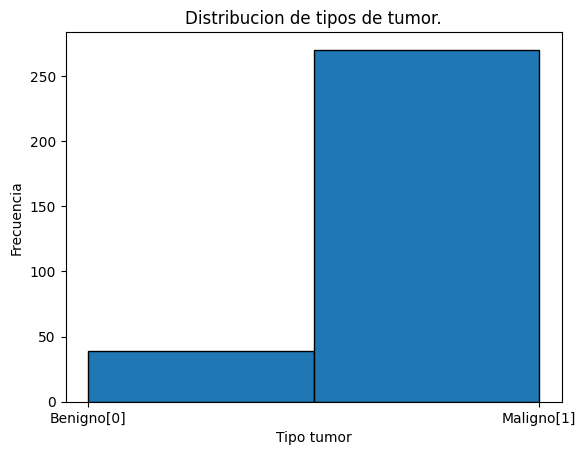

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#Grafica de frecuencia de tumor maligno vs benigno.
import matplotlib.pyplot as plt
plt.hist(Y, bins=2, edgecolor='black')
plt.xticks([0,1], ['Benigno[0]','Maligno[1]'])
plt.ylabel('Frecuencia')
plt.xlabel('Tipo tumor')
plt.title('Distribucion de tipos de tumor.')
plt.show()

9.2. Eliminacion de datos atipicos y nulos


In [ ]:
#Eliminar datos incompletos e inconsistentes (null o fuera de [sigma*3, sigma*3])
datosAntes = X.shape[0]
print(f"nº datos original: {datosAntes}")

removedTargets = []
#Iterar sobre cada columna
media = X["AGE"].mean()
desv =X["AGE"].std()

#Iterar sobre cada fila
for i, value in X["AGE"].items():
  if value is None or value < media - (desv * 3) or value > media + (desv * 3):
    removedTargets.append(i)

# Eliminar filas de los datos
X = X.drop(removedTargets)
X = X.reset_index(drop=True)

Y = Y.drop(removedTargets)
Y = Y.reset_index(drop=True)

datosDespues = X.shape[0]
print(f"nº datos purgados: {datosDespues}")
print(f"total datos eliminados: {datosAntes - datosDespues}")

nº datos original: 309
nº datos purgados: 307
total datos eliminados: 2


9.3.KNN

Mejor valor de n_neighbors: 5
Precisión en conjunto de test: 0.8565539112050742
Precisión en conjunto de entrenamiento con el mejor modelo: 0.8796
Precisión en conjunto de test con el mejor modelo:0.9247


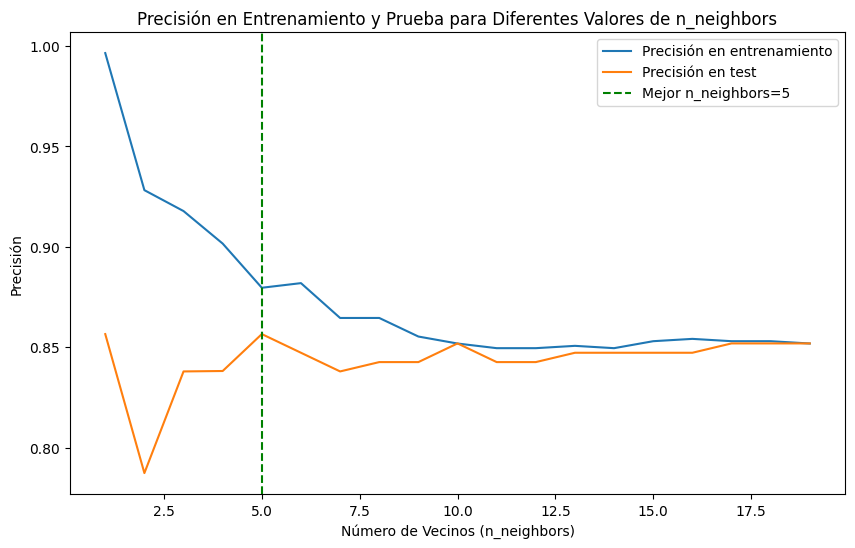

In [ ]:
# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir los hiperparámetros y sus valores a probar
param_grid = {'n_neighbors': np.arange(1, 20)}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Ajustar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
results = grid_search.cv_results_

# Obtener el mejor valor de n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Imprimir los resultados
print("Mejor valor de n_neighbors:", best_n_neighbors)
print("Precisión en conjunto de test:", grid_search.best_score_)

# Entrenar el modelo final con el mejor valor de n_neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento y prueba
train_accuracy_knn = results['mean_train_score'][results['params'].index({'n_neighbors': best_n_neighbors})]
test_accuracy_knn = best_knn.score(X_test, y_test)

# Imprimir las precisiones
print(f"Precisión en conjunto de entrenamiento con el mejor modelo: {train_accuracy_knn:.4f}")
print(f"Precisión en conjunto de test con el mejor modelo:{test_accuracy_knn:.4f}")

# Graficar la precisión en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_train_score'], label='Precisión en entrenamiento')
plt.plot(results['param_n_neighbors'], results['mean_test_score'], label='Precisión en test')
plt.axvline(x=best_n_neighbors, color='green', linestyle='--', label=f'Mejor n_neighbors={best_n_neighbors}')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Precisión')
plt.title('Precisión en Entrenamiento y Prueba para Diferentes Valores de n_neighbors')
plt.legend()
plt.show()

# Realizar predicciones para matriz de confusión en el conjunto de prueba
y_pred = best_knn.predict(X_test)

# Calcular la matriz de confusión
knn_conf_matrix2 = confusion_matrix(y_test, y_pred)

9.4) Modelo Lineal


In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import pandas as pd
import numpy as np

# Supongamos que 'datos' es tu DataFrame que contiene todas las variables incluida la variable de respuesta 'target'
# Reemplace 'datos' con sus datos reales
# datos = ...
# Convertir todas las columnas a tipos numéricos
datos_numericos = datos.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
datos_numericos = datos_numericos.dropna()

# Separar la variable de respuesta 'target' y las características
Y= datos_numericos['LUNG_CANCER']
X = datos_numericos.drop('LUNG_CANCER', axis=1)

# Definir la cantidad de modelos y características por modelo
num_models = 8
num_features_per_model = 5

best_model = None
best_aic = float('inf')

# Iterar para ajustar 8 modelos lineales con 5 características cada uno
for i in range(num_models):
    # Seleccionar 5 características aleatorias
    selected_features = np.random.choice(X.columns, num_features_per_model, replace=False)

    # Asegurarse de que hay suficientes datos para ajustar el modelo
    if len(X) > 0:
        # Ajustar un modelo lineal usando OLS de statsmodels
        X_subset = X[selected_features]
        X_subset = add_constant(X_subset)

        model = OLS(Y, X_subset).fit()

        # Calcular el criterio de Akaike (AIC)
        aic = model.aic

        # Actualizar el mejor modelo si es necesario
        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_features = selected_features

            # Hacer predicciones en el conjunto de prueba
            X_test_subset = X_test[selected_features]
            X_test_subset = add_constant(X_test_subset)
            y_test_pred = best_model.predict(X_test_subset)

          # Convertir las predicciones continuas en etiquetas binarias
            umbral = 0.5  # Ajusta este umbral según tus necesidades
            y_test_pred_binary = np.where(y_test_pred >= umbral, 1, 0)

# Imprimir el resumen del mejor modelo
print(f"Mejor valor de AIC: {best_aic:.4f}")
print("Características del mejor modelo:", best_features)

# Calcular la matriz de confusión
aic_conf_matrix2 = confusion_matrix(y_test, y_test_pred_binary)

Mejor valor de AIC: 117.8942
Características del mejor modelo: ['ALLERGY ' 'SWALLOWING DIFFICULTY' 'CHEST PAIN' 'SMOKING' 'COUGHING']


9.5. Arbol



La profundidad óptima es: 4
La precisión en prueba del modelo óptimo es: 0.9462
La precisión en entrenamiento del modelo óptimo es: 0.9120


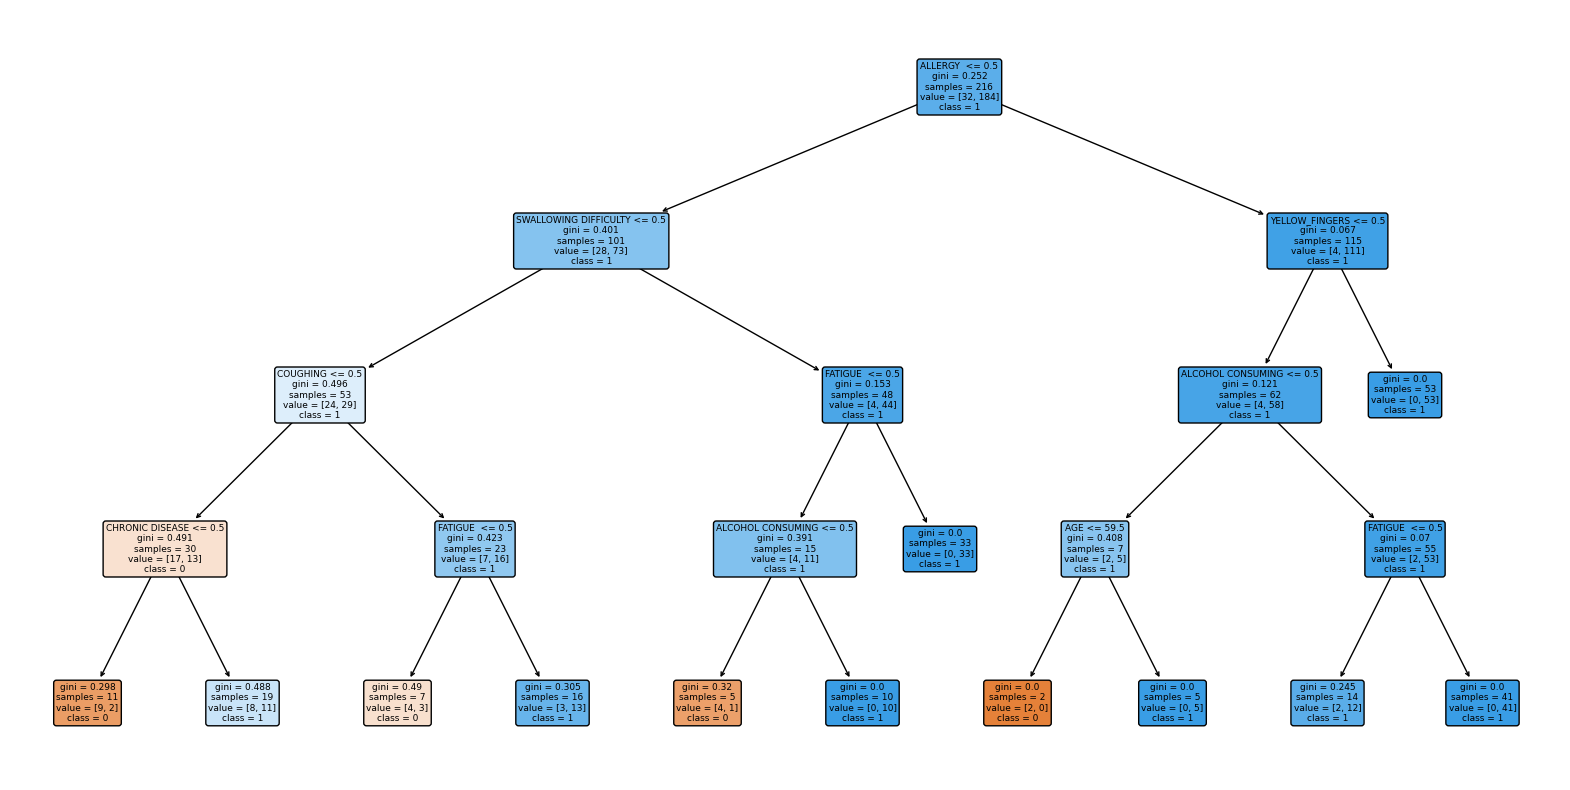

In [ ]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=0)

# Probar diferentes profundidades usando validación cruzada
depth_range = range(1, 15)
best_accuracy_arbol = 0
best_depth = 0
best_y_pred_test = 0

for depth in depth_range:
    model.set_params(max_depth=depth)

    # Realizar validación cruzada con 5 divisiones
    scores = cross_val_score(model, X, Y, cv=5)

    # Calcular la precisión promedio
    mean_accuracy = scores.mean()

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_test = model.predict(X_test)
    y_pred_train= model.predict(X_train)

    # Calcular la precisión en el conjunto de prueba
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train= accuracy_score(y_train, y_pred_train)


    # Actualizar la profundidad óptima si se encuentra un mejor modelo
    if accuracy_test > best_accuracy_arbol:
        best_accuracy_arbol = accuracy_test
        best_train_arbol=accuracy_train
        best_depth = depth
        best_y_pred_test = y_pred_test

# Imprimir la profundidad óptima y la precisión en prueba
print(f"\nLa profundidad óptima es: {best_depth}")
print(f"La precisión en prueba del modelo óptimo es: {best_accuracy_arbol:.4f}")
print(f"La precisión en entrenamiento del modelo óptimo es: {best_train_arbol:.4f}")
#Dibujar arbol
bclf= DecisionTreeClassifier(max_depth=best_depth)
bclf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(bclf, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in bclf.classes_], rounded=True)
plt.show()

# Calcular la matriz de confusión
tree_conf_matrix2 = confusion_matrix(y_test, best_y_pred_test)

9.6.Modelo Bayesiano

In [ ]:
# Importar bibliotecas necesarias
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB

# Crear el modelo de árbol de decisión
model = MultinomialNB()

# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'alpha': [1e-10,0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la precisión en el conjunto de prueba
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir resultados
print(f"Mejores parámetros: {best_params}")
print(f"Precisión en el conjunto de prueba: {best_model.score(X_test, y_test):.4f}")
print(f"Precision conjunto de entrenamiento:{best_model.score(X_train, y_train):.4f}")

# Realizar predicciones para matriz de confusión en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión
bayes_conf_matrix2 = confusion_matrix(y_test, y_pred)

Mejores parámetros: {'alpha': 1e-10}
Precisión en el conjunto de prueba: 0.9570
Precision conjunto de entrenamiento:0.8796


9.7 Matrices de confusión

nº vecinos optimo: 5
Exactitud test knn: 0.9247
Exactitud train knn: 0.8796

Mejor AIC: 117.8942
Características del modelo: ['ALLERGY ' 'SWALLOWING DIFFICULTY' 'CHEST PAIN' 'SMOKING' 'COUGHING']
Exactitud test: 0.9298
Exactitud entrenamiento: 0.9495

La profundidad óptima es: 4
La precisión en prueba del modelo óptimo es: 0.9462
La precisión en entrenamiento del modelo óptimo es: 0.9120

Mejores parámetros: {'alpha': 1e-10}
Precisión en el conjunto de prueba: 0.9570
Precision conjunto de entrenamiento:0.8796


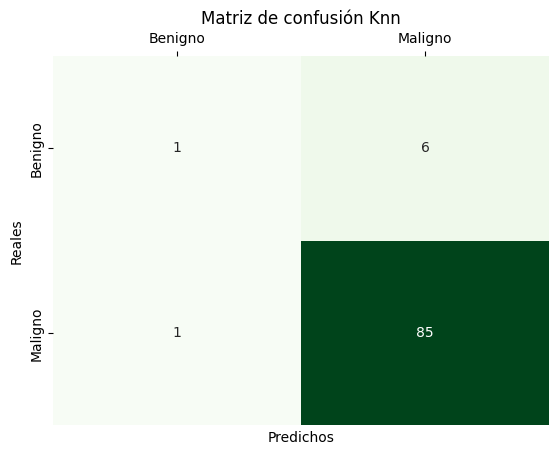

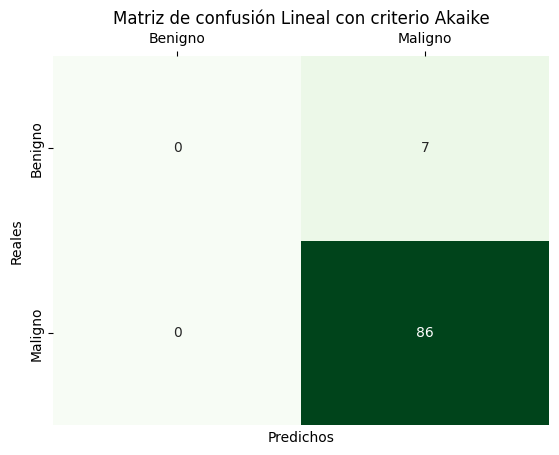

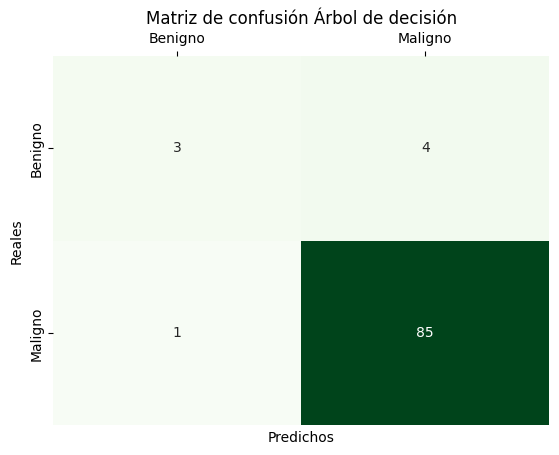

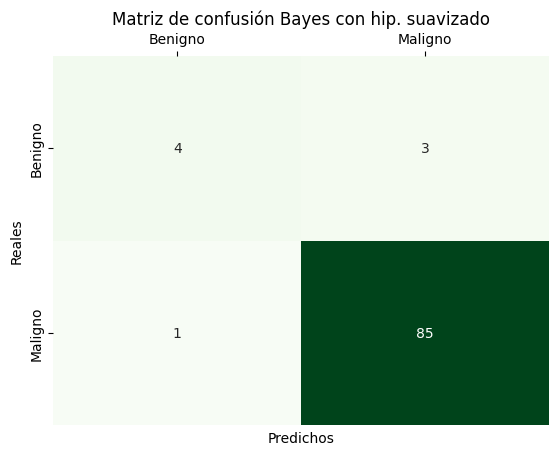

In [ ]:
#Exactitud en KNN
print("nº vecinos optimo:", best_n_neighbors)
print(f"Exactitud test knn: {test_accuracy_knn:.4f}")
print(f"Exactitud train knn: {train_accuracy_knn:.4f}")

# Exactitud Modelo Lineal
print(f"\nMejor AIC: {best_aic:.4f}")
print(f"Características del modelo:", best_features)
print(f"Exactitud test: {best_test_ml:.4f}")
print(f"Exactitud entrenamiento: {best_ent_ml:.4f}")

# Exactitud Arboles
print(f"\nLa profundidad óptima es: {best_depth}")
print(f"La precisión en prueba del modelo óptimo es: {best_accuracy_arbol:.4f}")
print(f"La precisión en entrenamiento del modelo óptimo es: {best_train_arbol:.4f}")

# Exactitud Modelo Bayesiano
print(f"\nMejores parámetros: {best_params}")
print(f"Precisión en el conjunto de prueba: {best_model.score(X_test, y_test):.4f}")
print(f"Precision conjunto de entrenamiento:{best_model.score(X_train, y_train):.4f}")

modelos = {
  'knn': { 'nombre': 'Knn', 'modelo': knn_conf_matrix2 },
  'aic': { 'nombre': 'Lineal con criterio Akaike', 'modelo': aic_conf_matrix2 },
  'tree': { 'nombre': 'Árbol de decisión', 'modelo': tree_conf_matrix2 },
  'bayes': { 'nombre': 'Bayes con hip. suavizado', 'modelo': bayes_conf_matrix2 },
}

#Obtener matriz para cada modelo
for model_key, model_info in modelos.items():
  #Mostrar tabla matrices de confusión
  ax = sns.heatmap(model_info['modelo'], annot=True, fmt="d", cmap="Greens", cbar=False,
              xticklabels=['Benigno', 'Maligno'],
              yticklabels=['Benigno', 'Maligno'])
  ax.xaxis.tick_top()
  plot.title(f"Matriz de confusión {model_info['nombre']}")
  plot.xlabel('Predichos')
  plot.ylabel('Reales')
  plot.show()
  print()